In [1]:
# import numpy
import numpy as np

# load up arm parameters arm_params and some helper functions
from twojointarm_funs import *

# for plotting
import matplotlib.pyplot as plt

In [4]:
# Setup initial conditions of simulation

A0    = np.array([45,90]) * np.pi/180  # arm mid-movement position: (45,90) degrees (shoulder,elbow)
H0,E0 = joints_to_hand(A1, arm_params) # convert to cartesian (x,y) hand position H1
mt    = 1.000                          # movement time (sec)
sr    = 100                            # sample rate (Hz)
movdist = 0.20                         # total movement distance (m)
r     = movdist/2                      # half-distance
npts  = int(mt*sr)+1                   # number of time points

In [6]:
# starting positions (angles around the unit circle)

angs =np.array([360-132, 360-46])*np.pi/180 # radians
n = len(angs)

In [11]:
# initialize arrays to store torques, hand paths, and joint angles
QQ = np.zeros((npts,2,n)) # muscle torques (Nm)
HH = np.zeros((npts,2,n)) # hand position (m)
AA = np.zeros((npts,2,n)) # joint angles (rad)

array([-0.08273149,  0.56130136])

In [12]:
# compute min-jerk trajectory and muscle torques using inverse dynamics for each starting angle

for i, a in enumerate(angs):
    sincos = np.array([np.cos(a), np.sin(a)])
    H1 = H0 + r*sincos
    H2 = H0 - r*sincos
    t,H,Hd,Hdd = minjerk(H1,H2,mt,npts)
    A,Ad,Add = hand_to_joints((H,Hd,Hdd),arm_params)
    Q = inverse_dynamics(A,Ad,Add,arm_params)
    QQ[:,:,i] = Q
    HH[:,:,i] = H
    AA[:,:,i] = A


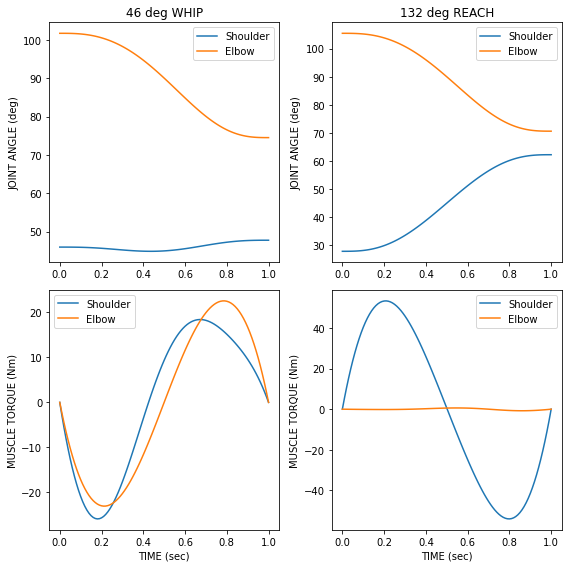

In [35]:
fig, ax = plt.subplots(2,2, figsize=(8,8))
ax[0,0].plot(t,AA[:,:,0]*180/np.pi)
ax[0,0].set(ylabel="JOINT ANGLE (deg)", title="46 deg WHIP")
ax[0,0].legend(["Shoulder","Elbow"])
ax[0,1].plot(t,AA[:,:,1]*180/np.pi)
ax[0,1].set(ylabel="JOINT ANGLE (deg)", title="132 deg REACH")
ax[0,1].legend(["Shoulder","Elbow"])
ax[1,0].plot(t,QQ[:,:,0]*180/np.pi)
ax[1,0].set(ylabel="MUSCLE TORQUE (Nm)", xlabel="TIME (sec)")
ax[1,0].legend(["Shoulder","Elbow"])
ax[1,1].plot(t,QQ[:,:,1]*180/np.pi)
ax[1,1].set(ylabel="MUSCLE TORQUE (Nm)", xlabel="TIME (sec)")
ax[1,1].legend(["Shoulder","Elbow"])
fig.tight_layout()